# importing libraries

In [1]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import openpyxl
import requests
from io import BytesIO
import warnings
warnings.filterwarnings('ignore')



# Reading the data

In [2]:
spreadsheetId = '1Y_g6LQI2GLqpKf-fj-rH7D9gfnP2MJzpFA6t0AsBMi8' 
url = "https://docs.google.com/spreadsheets/export?exportFormat=xlsx&id=" + spreadsheetId
res = requests.get(url)
data = BytesIO(res.content)
xlsx = openpyxl.load_workbook(filename=data)
for name in xlsx.sheetnames:
    print(name)


Class 1
Class 2


In [3]:
class1_data=pd.read_excel(data, sheet_name="Class 1")
class2_data=pd.read_excel(data, sheet_name="Class 2")

In [4]:
class1_data=class1_data.dropna(axis=1,how='all')
class2_data=class2_data.dropna(axis=1, how='all')

# Filling the nan vlaues of the "Type" column

In [5]:
class1_data['Type']=class1_data['Type'].fillna('STUDENT')
class2_data['Type']=class2_data['Type'].fillna('STUDENT')

# Filling Na values of other columns

In [6]:
a=list(set(class1_data.columns)-set(class1_data._get_numeric_data().columns))
for i in a:
    class1_data[i]=class1_data[i].fillna('Missed')
b=list(set(class2_data.columns)-set(class2_data._get_numeric_data().columns))
for i in b:    
    class2_data[i]=class2_data[i].fillna('Missed')
    
c=class1_data._get_numeric_data().columns
for i in c:
    class1_data[i]=class1_data[i].fillna(int(0))
    
d=class2_data._get_numeric_data().columns
for i in d:    
    class2_data[i]=class2_data[i].fillna(int(0))






# Question 1 :: Which students need attention for missing sessions?

In [7]:
counts=[]
for i in range(len(class1_data)):
    count=0
    for j in class1_data.iloc[i]:
        if j=='Missed':
            count+=1
    counts.append(count)
class1_data['total_missing section']=counts
a=list(class1_data.loc[class1_data['total_missing section']>(max(class1_data['total_missing section'])*60)/100]['Student Roll Num'])
print("These are the students roll number who need attention for missing section")
print(*a,sep=',')


These are the students roll number who need attention for missing section
1.0,5.0,8.0,9.0,10.0,18.0,19.0,21.0,23.0,32.0,33.0,35.0,36.0,37.0,39.0,43.0,46.0,49.0,50.0,51.0,52.0,55.0


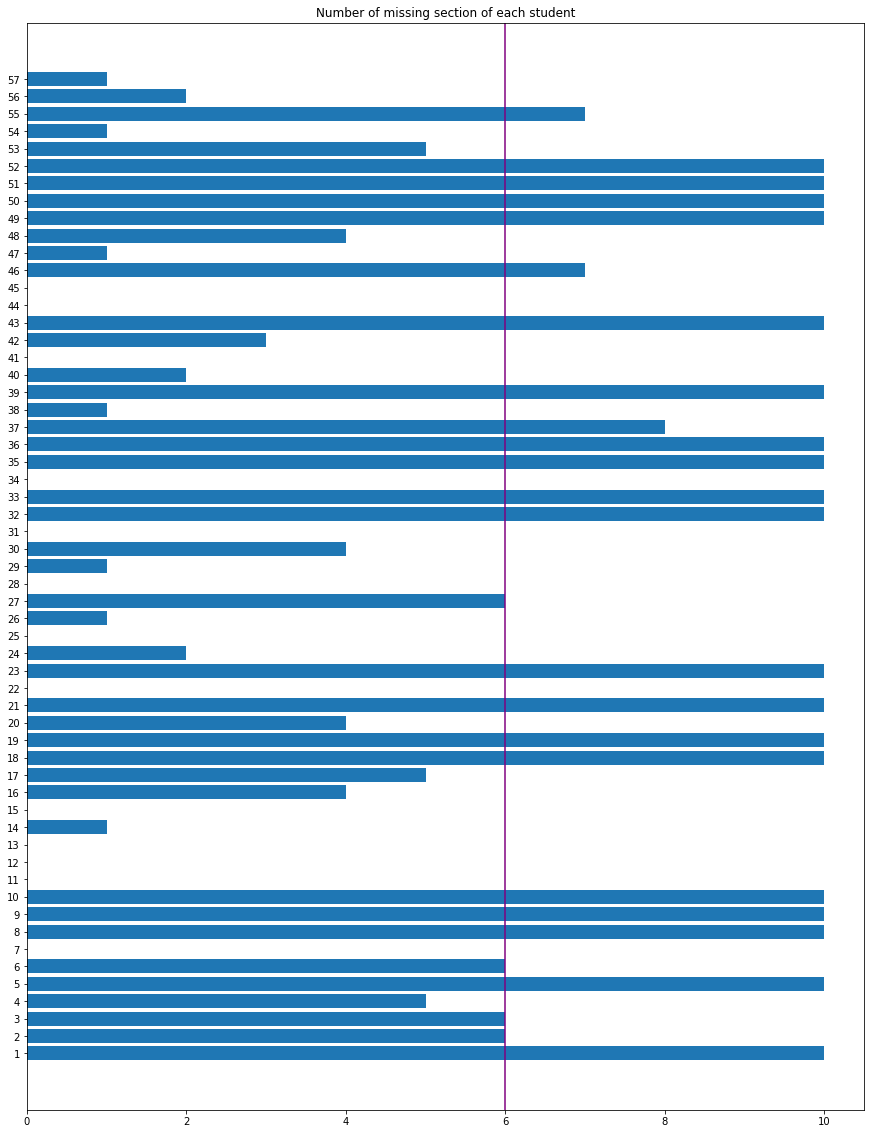

In [8]:
#plot
plt.figure(figsize=(15,20))
plt.barh(class1_data['Student Roll Num'],class1_data['total_missing section'])
plt.yticks(class1_data['Student Roll Num'])
plt.axvline(x = (max(class1_data['total_missing section'])*60)/100, color = 'purple', label = 'axvline - full height')
plt.title("Number of missing section of each student")
plt.show()

- From the above plot , the students having number of missed class greater than 6 (after the purple line) need attention.

In [9]:
counts=[]
for i in range(len(class2_data)):
    count=0
    for j in class2_data.iloc[i]:
        if j=='Missed':
            count+=1
    counts.append(count)
class2_data['total_missing section']=counts
a=list(class2_data.loc[class2_data['total_missing section']>(max(class2_data['total_missing section'])*60)/100]['Student Roll Num'])
print("These are the students roll number who need attention for missing section")
print(*a,sep=',')



These are the students roll number who need attention for missing section
3.0,5.0,6.0,7.0,14.0,16.0,19.0,21.0,22.0,23.0,32.0,35.0,38.0,39.0,42.0,43.0,44.0,47.0,48.0,49.0,52.0,53.0,60.0,66.0,67.0


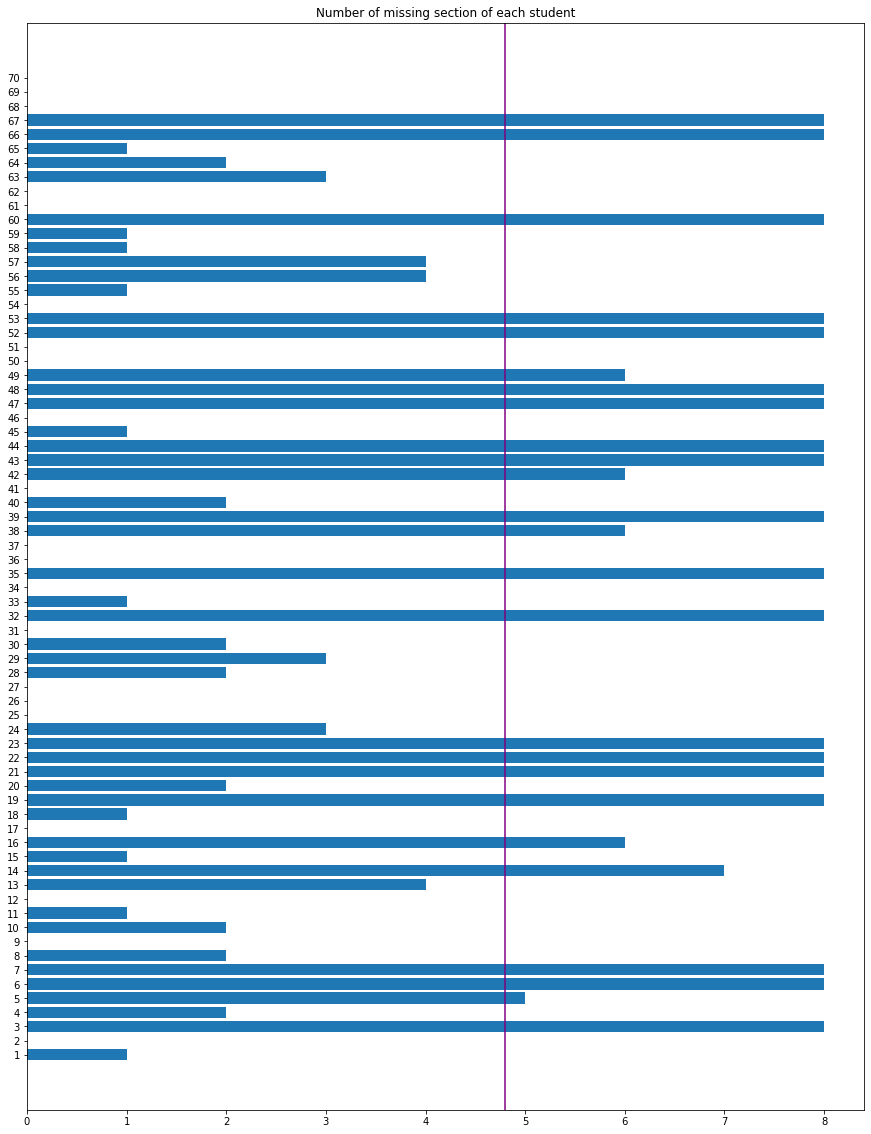

In [10]:
#plot
plt.figure(figsize=(15,20))
plt.barh(class2_data['Student Roll Num'],class2_data['total_missing section'])
plt.yticks(class2_data['Student Roll Num'])
plt.axvline(x = (max(class2_data['total_missing section'])*60)/100, color = 'purple', label = 'axvline - full height')
plt.title("Number of missing section of each student")
plt.show()

- From the above plot , the students having number of missed class greater than 4.7 (after the purple line) need attention.

# Question 2 :: Which students are unsatisfied?

In [11]:
counts=[]

for i in range(len(class1_data)):
    total_class=0
    count=0
    for j in class1_data.iloc[i][1:-1]:
        if str(j).isdigit():
                count=count+j
                total_class+=1
        else:
            pass
    counts.append(count/total_class)
    
class1_data['Average_rating']=counts
class1_data['Satisfied or unsatisfied']=np.where(class1_data['Average_rating']>=7.5, 'Satisfied', 'Unsatisfied')
p=class1_data.loc[class1_data['Satisfied or unsatisfied']=='Unsatisfied']['Student Roll Num']
print("These are the students roll number who are Unsatisfied")
for i in p:
    print(i,end=',')
    


These are the students roll number who are Unsatisfied
2.0,3.0,7.0,8.0,9.0,18.0,19.0,20.0,21.0,22.0,26.0,27.0,30.0,32.0,35.0,41.0,43.0,45.0,48.0,50.0,52.0,53.0,54.0,55.0,56.0,57.0,

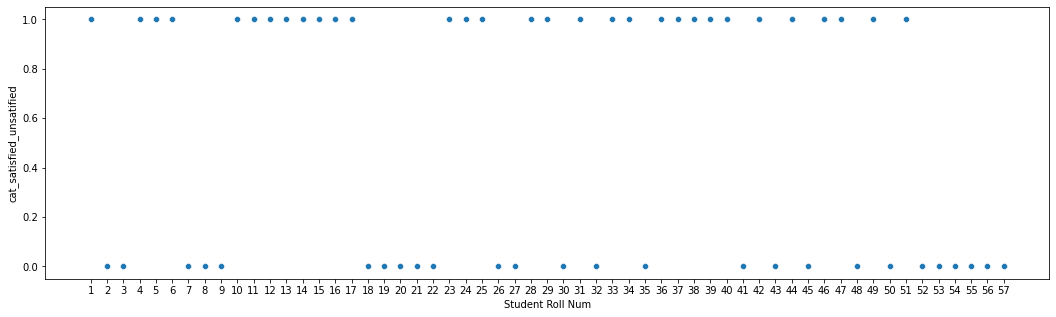

In [12]:
#plot
plt.figure(figsize=(18,5))
new_data=class1_data[['Student Roll Num','Satisfied or unsatisfied']]
new_data['cat_satisfied_unsatified']=np.where(new_data['Satisfied or unsatisfied']=='Satisfied',1,0)
sns.scatterplot(y='cat_satisfied_unsatified',x='Student Roll Num',data=new_data)
plt.xticks(new_data['Student Roll Num'])
plt.show()

- From the above plot we can say that if the cat-satisfied_unsatisfied(y_axis) value is 0 then the students are unsatisfied.

In [13]:
counts=[]

for i in range(len(class2_data)):
    total_class=0
    count=0
    for j in class2_data.iloc[i][1:-1]:
        if str(j).isdigit():
                count=count+j
                total_class+=1
        else:
            pass
    counts.append(count/total_class)
    
class2_data['Average_rating']=counts
class2_data['Satisfied or unsatisfied']=np.where(class2_data['Average_rating']>=7.5, 'Satisfied', 'Unsatisfied')
p=class2_data.loc[class2_data['Satisfied or unsatisfied']=='Unsatisfied']['Student Roll Num']
for i in p:
    print(i,end=',')



1.0,3.0,7.0,9.0,10.0,12.0,13.0,14.0,15.0,17.0,18.0,21.0,23.0,24.0,26.0,28.0,29.0,30.0,31.0,33.0,36.0,37.0,38.0,40.0,42.0,43.0,44.0,45.0,49.0,50.0,57.0,60.0,63.0,64.0,65.0,66.0,68.0,

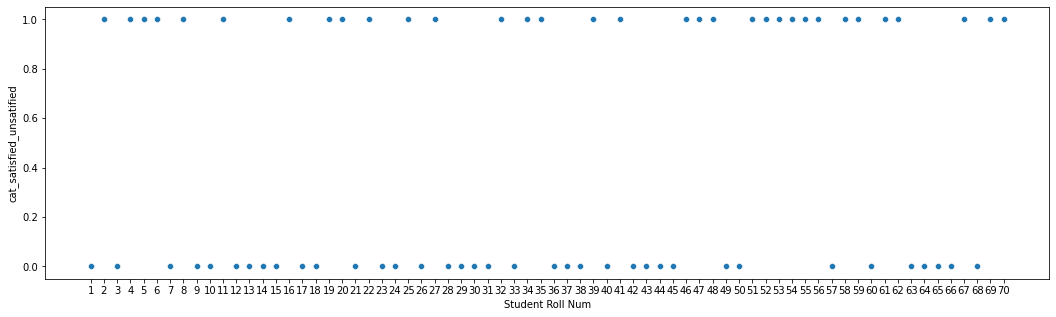

In [14]:
#plot
plt.figure(figsize=(18,5))
new_data=class2_data[['Student Roll Num','Satisfied or unsatisfied']]
new_data['cat_satisfied_unsatified']=np.where(new_data['Satisfied or unsatisfied']=='Satisfied',1,0)
sns.scatterplot(y='cat_satisfied_unsatified',x='Student Roll Num',data=new_data)
plt.xticks(new_data['Student Roll Num'])
plt.show()

- From the above plot we can say that if the cat-satisfied_unsatisfied(y_axis) value is 0 then the students are unsatisfied.

# Question 3: Which students are satisfied

In [15]:
q=class1_data.loc[class1_data['Satisfied or unsatisfied']=='Satisfied']['Student Roll Num']
print("These are the students roll number who are satisfied")
for i in q:
    print(i,end=',')



These are the students roll number who are satisfied
1.0,4.0,5.0,6.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,23.0,24.0,25.0,28.0,29.0,31.0,33.0,34.0,36.0,37.0,38.0,39.0,40.0,42.0,44.0,46.0,47.0,49.0,51.0,

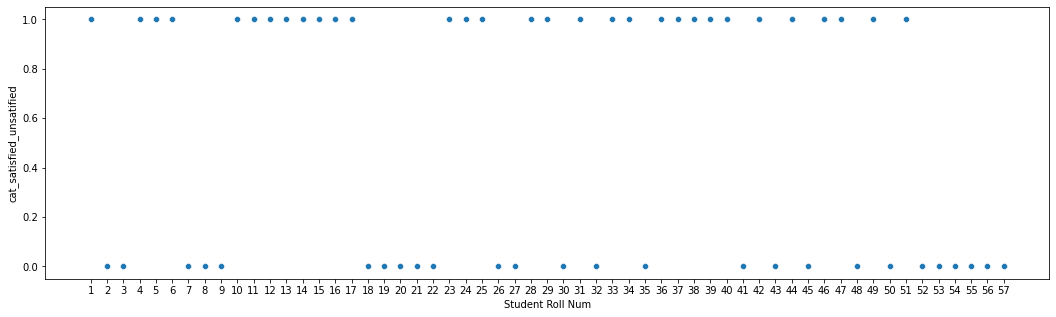

In [16]:
#plot
plt.figure(figsize=(18,5))
new_data=class1_data[['Student Roll Num','Satisfied or unsatisfied']]
new_data['cat_satisfied_unsatified']=np.where(new_data['Satisfied or unsatisfied']=='Satisfied',1,0)
sns.scatterplot(y='cat_satisfied_unsatified',x='Student Roll Num',data=new_data)
plt.xticks(new_data['Student Roll Num'])
plt.show()

- From the above plot we can say that if the cat-satisfied_unsatisfied(y_axis) value is 1 then the students are satisfied.

In [17]:
q=class2_data.loc[class2_data['Satisfied or unsatisfied']=='Satisfied']['Student Roll Num']
print("These are the students roll number who are satisfied")
for i in q:
    print(i,end=',')



These are the students roll number who are satisfied
2.0,4.0,5.0,6.0,8.0,11.0,16.0,19.0,20.0,22.0,25.0,27.0,32.0,34.0,35.0,39.0,41.0,46.0,47.0,48.0,51.0,52.0,53.0,54.0,55.0,56.0,58.0,59.0,61.0,62.0,67.0,69.0,70.0,

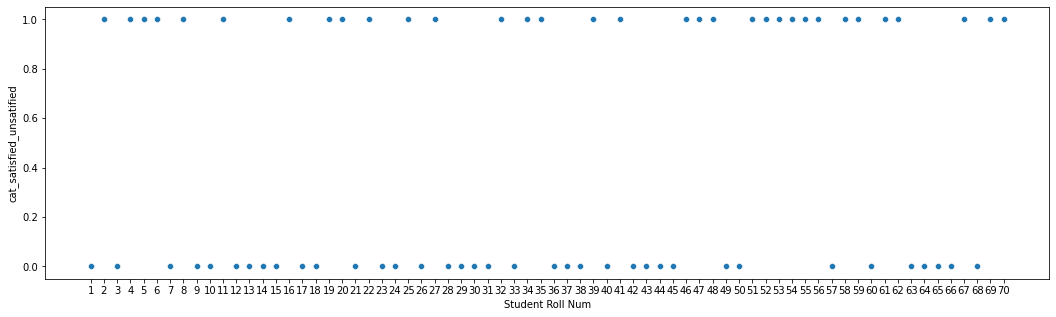

In [18]:
#plot
plt.figure(figsize=(18,5))
new_data=class2_data[['Student Roll Num','Satisfied or unsatisfied']]
new_data['cat_satisfied_unsatified']=np.where(new_data['Satisfied or unsatisfied']=='Satisfied',1,0)
sns.scatterplot(y='cat_satisfied_unsatified',x='Student Roll Num',data=new_data)
plt.xticks(new_data['Student Roll Num'])
plt.show()

- From the above plot we can say that if the cat-satisfied_unsatisfied(y_axis) value is 1 then the students are satisfied.

# Useful insights

Text(0.5, 1.0, 'Distribution of Students Type of class 1')

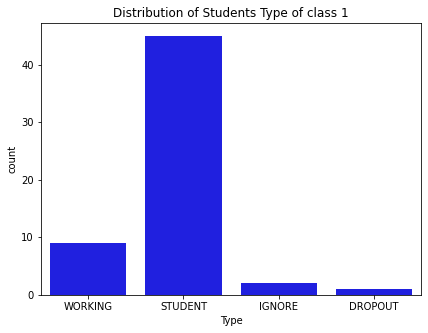

In [19]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.countplot(x='Type', data=class1_data, color='blue')
plt.title("Distribution of Students Type of class 1")




Text(0.5, 1.0, 'Distribution of Students Type class 2')

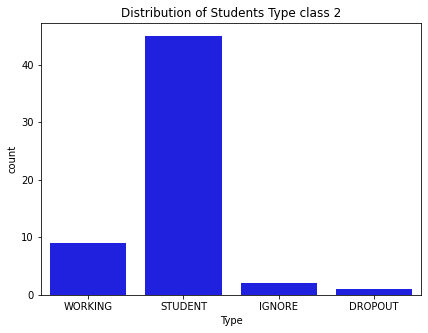

In [20]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,2)
sns.countplot(x='Type', data=class1_data, color='blue')

plt.title("Distribution of Students Type class 2")

- From the above plots we can see that in both the classes most of are students.

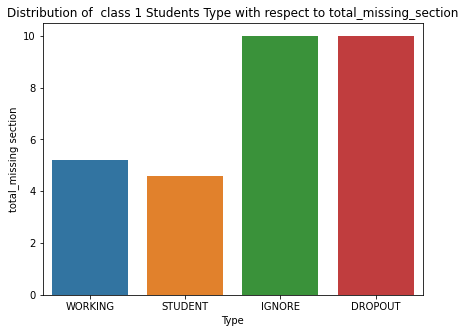

In [21]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.barplot(x='Type',y='total_missing section',data=class1_data,ci=None)
plt.title("Distribution of  class 1 Students Type with respect to total_missing_section")
plt.show()


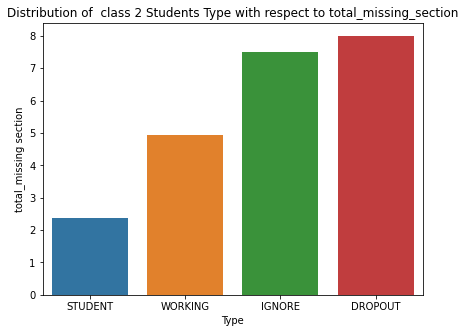

In [22]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,2)
sns.barplot(x='Type',y='total_missing section',data=class2_data,ci=None)
plt.title("Distribution of  class 2 Students Type with respect to total_missing_section")
plt.show()

- From the above plots we can say that most of the ignore and dropout students missed the class